# Data Analysis of WoS
## Preprocess

In [18]:
# every is a list of every article info (by dividing content with '\n')

import json
every = []
# if your savedrecs files are stored in directory, change '' to 'Your_directory_name'
directory_name = ''
for i in range(47):
    if i == 0:
        filename = directory_name+'savedrecs.txt'
    else:
        filename = directory_name+'savedrecs' + ' (' + str(i) + ').txt'
    with open(filename, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        last_end = 0
        for idx, line in enumerate(lines):
            if line == '\n':
                every.append(lines[last_end:idx])
                last_end = idx+1

# The types of meta data depend on customer selection of content when exporting the savedrecs files.
pu_doi = {}
doi_dic = {}
for e in every:
    doi = []
    pu = []
    ab = []
    ji = []
    py = []
    dt = []
    sc = []
    tc = []
    wc = []
    i_d = []
    ti = []
    de = []
    for line in e:
        sp = line.split(' ', 1)
        if sp[0] == 'DI':
            doi.append(sp[1][:-1])
        elif sp[0] == 'PU':
            pu.append(sp[1][:-1])
        elif sp[0] == 'AB':
            ab.append(sp[1][:-1])
        elif sp[0] == 'JI':
            ji.append(sp[1][:-1])
        elif sp[0] == 'PY':
            py.append(sp[1][:-1])
        elif sp[0] == 'DT':
            dt.append(sp[1][:-1])
        elif sp[0] == 'SC':
            sc.append(sp[1][:-1])
        elif sp[0] == 'TC':
            tc.append(sp[1][:-1])
        elif sp[0] == 'WC':
            wc.append(sp[1][:-1])
        elif sp[0] == 'ID':
            i_d.append(sp[1][:-1])
        elif sp[0] == 'TI':
            ti.append(sp[1][:-1])
        elif sp[0] == 'DE':
            de.append(sp[1][:-1])
    # pu
    if len(doi) == 1 and len(pu) == 1:
        if pu[0] not in pu_doi.keys():
            pu_doi[pu[0]] = [doi[0]]
        else:
            pu_doi[pu[0]].append(doi[0])
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['publisher'] = pu[0]
        else:
            doi_dic[doi[0]]['publisher'] = pu[0]
    # ab
    if len(doi)== 1 and len(ab) == 1:
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['abstract'] = ab[0]
        else:
            doi_dic[doi[0]]['abstract'] = ab[0]
    # ji
    if len(doi)== 1 and len(ji) == 1:
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['journal'] = ji[0]
        else:
            doi_dic[doi[0]]['journal'] = ji[0]
    # py
    if len(doi)== 1 and len(py) == 1:
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['year'] = py[0]
        else:
            doi_dic[doi[0]]['year'] = py[0]
    # dt
    if len(doi)== 1 and len(dt) == 1:
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['type'] = dt[0]
        else:
            doi_dic[doi[0]]['type'] = dt[0]
    # sc
    if len(doi)== 1 and len(sc) == 1:
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['category'] = sc[0]
        else:
            doi_dic[doi[0]]['category'] = sc[0]
    # tc
    if len(doi)== 1 and len(tc) == 1:
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['citation'] = tc[0]
        else:
            doi_dic[doi[0]]['citation'] = tc[0]
    # wc
    if len(doi)== 1 and len(wc) == 1:
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['wc'] = wc[0]
        else:
            doi_dic[doi[0]]['wc'] = wc[0]
    # id
    if len(doi)== 1 and len(i_d) == 1:
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['i_d'] = i_d[0]
        else:
            doi_dic[doi[0]]['i_d'] = i_d[0]
    # ti
    if len(doi)== 1 and len(ti) == 1:
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['title'] = ti[0]
        else:
            doi_dic[doi[0]]['title'] = ti[0]
    # de
    if len(doi)== 1 and len(de) == 1:
        if doi[0] not in doi_dic.keys():
            doi_dic[doi[0]] = {}
            doi_dic[doi[0]]['keywords'] = de[0]
        else:
            doi_dic[doi[0]]['keywords'] = de[0]
json_str = json.dumps(doi_dic, indent=4)
with open('per_meta.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)

## 1. Composition of the different publisher – PU (bar chart)

There are 177 publisher names (different names may refer to same publisher)
There are 22752 doi in total
Show publisher names with number of doi larger than 100 in bar chart:


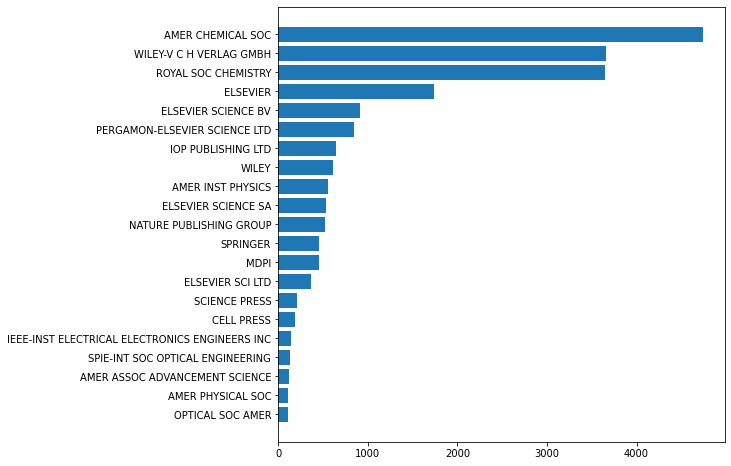

In [2]:
import matplotlib.pyplot as plt
sorted_pu = sorted(pu_doi.items(), key=lambda item:len(item[1]), reverse=True)
pu_n = len(sorted_pu)
total_count = 0
name_100 = []
num_100 = []
for sp in sorted_pu:
    total_count += len(sp[1])
    if len(sp[1])>100:
        name_100.append(sp[0])
        num_100.append(len(sp[1]))
    # print(sp[0], len(sp[1]))
print('There are '+str(pu_n)+' publisher names (different names may refer to same publisher)')
print('There are ' + str(total_count)+' doi in total')
print('Show publisher names with number of doi larger than 100 in bar chart:')
plt.figure(figsize=(8,8)) 
plt.barh(name_100[::-1], num_100[::-1])
plt.show()

## 2. Abstract summary – AB ( have a try in MATSCHOLAR)

In [3]:
# need api key. Requesting... 
import json

ab_dict = {}
key_words = ['C) 20', '(C) 20', 'C) 19', '(C) 19', 'c) 20', '(c) 20', 'c) 19', '(c) 19']

for k in doi_dic.keys():
    if 'abstract' in doi_dic[k].keys():
        single_ab = doi_dic[k]['abstract']
        flag = 0
        for key in key_words:
            if key in single_ab:
                pos = single_ab.index(key)
                ab_dict[k] = single_ab[:pos]
                flag = 1
        if flag == 0:
            ab_dict[k] = single_ab
print(len(ab_dict.keys()))
json_str = json.dumps(ab_dict, indent=4)
with open('pervoskite.json', 'w', encoding='utf-8') as json_file:
    json_file.write(json_str)

21276


## 3. Journal name summary – JI (list publisher – Journal name with number) 

There are 21274 journal names
There are 766 different journal names
Show publisher names with number of doi larger than 200 in bar chart:


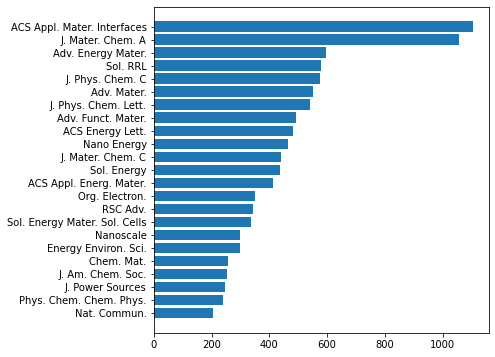

In [6]:
from collections import Counter
jour = []
for k in doi_dic.keys():
    if 'journal' in doi_dic[k].keys():
        dj = doi_dic[k]['journal']
        jour.append(dj)
print('There are '+ str(len(jour)) + ' journal names')
set_jour = list(set(jour))
print('There are '+ str(len(set_jour))+ ' different journal names')
result = Counter(jour)
ji_sorted = sorted(result.items(), key=lambda x: x[1], reverse=True)
jsname_100 = []
jsnum_100 = []
for js in ji_sorted:
    if js[1]>200:
        jsname_100.append(js[0])
        jsnum_100.append(js[1])
print('Show publisher names with number of doi larger than 200 in bar chart:')
plt.figure(figsize=(6,6)) 
plt.barh(jsname_100[::-1], jsnum_100[::-1])
plt.show()

## 4. Year Published - PY (line chart with mark)

Show paper number each year from 2000 to 2020


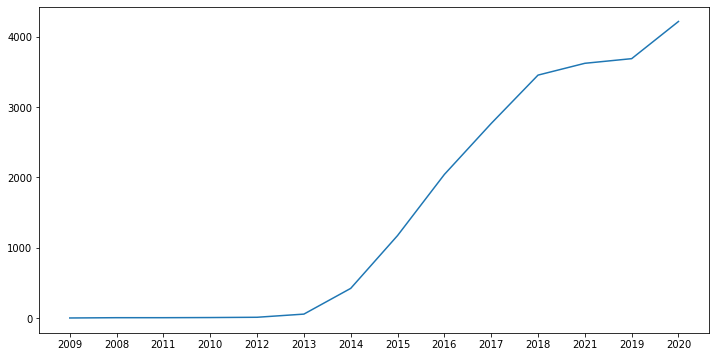

In [14]:
from collections import Counter
year = []
for k in doi_dic.keys():
    if 'year' in doi_dic[k].keys():
        year.append(doi_dic[k]['year'])
set_year = list(set(year))
result = Counter(year)
year_sorted = sorted(result.items(), key=lambda x: x[1], reverse=True)
yearname_100 = []
yearnum_100 = []
for ys in year_sorted:
    yearname_100.append(ys[0])
    yearnum_100.append(ys[1])
print('Show paper number each year from 2000 to 2020')
plt.figure(figsize=(12,6)) 
plt.plot(yearname_100[::-1], yearnum_100[::-1])
plt.show()

## 5. Data type - (DT pie chart)

There are 21 different types, which are ['Article; Data Paper', 'Correction', 'Letter; Early Access', 'Retraction', 'Article; Retracted Publication', 'Correction; Early Access', 'Review; Book Chapter', 'Proceedings Paper', 'Review; Early Access', 'Letter', 'Editorial Material', 'Reprint', 'Article; Proceedings Paper', 'News Item; Early Access', 'Meeting Abstract', 'Article', 'Review', 'Article; Early Access', 'Article; Book Chapter', 'Editorial Material; Early Access', 'News Item']
Show data types with number of doi larger than 100 in pie chart:


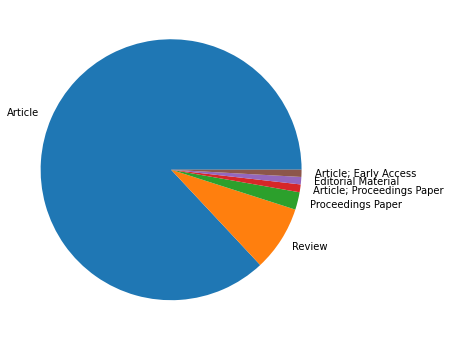

In [16]:
from collections import Counter
dt = []
for k in doi_dic.keys():
    if 'type' in doi_dic[k].keys():
        dt.append(doi_dic[k]['type'])
set_dt = list(set(dt))
print('There are '+ str(len(set_dt))+ ' different types, which are',set_dt)
print('Show data types with number of doi larger than 100 in pie chart:')
result = Counter(dt)
dt_sorted = sorted(result.items(), key=lambda x: x[1], reverse=True)
dtname = []
dtnum = []
for dts in dt_sorted:
    if int(dts[1]) > 100:
        dtname.append(dts[0])
        dtnum.append(int(dts[1]))
plt.figure(figsize=(6,6)) 
plt.pie(dtnum, labels=dtname)
plt.show()

## 6. Science category summay (SC bar chart)

Show science categories with number of paper larger than 100 in bar chart:


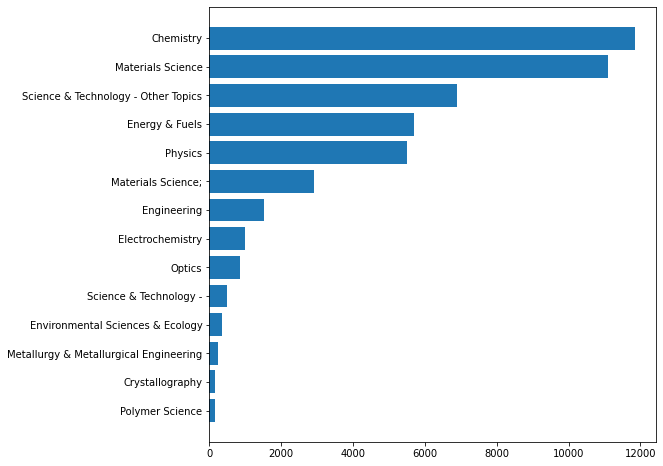

In [17]:
from collections import Counter
ca_list = []
for k in doi_dic.keys():
    if 'category' in doi_dic[k].keys():
        ca_list.append(doi_dic[k]['category'])
ca_dic = {}
for ca_text in ca_list:
    ca_split = ca_text.split('; ')
    for cs in ca_split:
        if cs not in ca_dic:
            ca_dic[cs] = 1
        else:
            ca_dic[cs] += 1
ca_sorted = sorted(ca_dic.items(), key=lambda item:item[1], reverse=True)
caname_100 = []
canum_100 = []
for cas in ca_sorted:
    if cas[1]>100:
        caname_100.append(cas[0])
        canum_100.append(cas[1])
print('Show science categories with number of paper larger than 100 in bar chart:')
plt.figure(figsize=(8,8)) 
plt.barh(caname_100[::-1], canum_100[::-1])
plt.show()